# Newton Rahmpson Method 

Newton Rahmpson Method starts with an initial guess for the root, and then iteratively refines the guess using the function and its derivative.
 
At each iteration, the method computes the tangent line to the function at the current guess, and finds the x-intercept of the tangent line, which is a new estimate for the root. This process is repeated until the estimate converges to a root of the function, or until a stopping criterion is met.

The Newton-Raphson method can be applied to scalar-valued or vector-valued functions.

## Tests and Graphical Reprisantations of  Newton Rahmpson Method 

### For Scalar Valued Functions  

###### First example

Scalar Valued Function
Approximate root x = 1.2489907439933392, iterations needed: 6




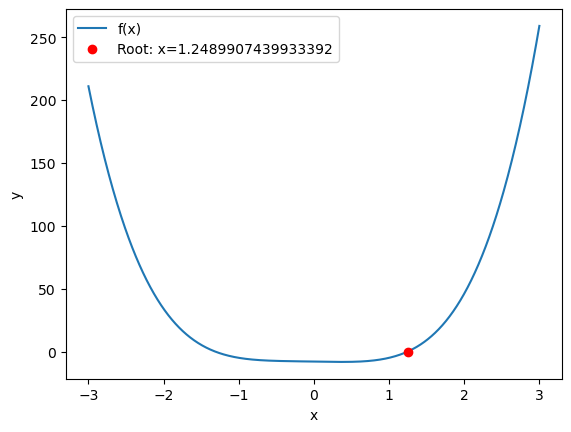

In [10]:
import newton_rahmpson_method as nrm
import numpy as np 
import matplotlib.pyplot as plt


def f(x):
    return x**3 + 3*(x**4) - x - 8
def df(x):
    return 3*(x**2) + 12*x**3 - 1
    
x0 = 2
x, it = nrm.newton_rahmpson_method(f, df, x0)
    
print("Scalar Valued Function")
print(f'Approximate root x = {x}, iterations needed: {it}')
print("\n")

# Create a plot of the function and the root

x_val = np.linspace(-3, 3, 1000)
y_val = f(x_val)
plt.plot(x_val, y_val, label='f(x)')
plt.plot(x, f(x), 'ro', label='Root: x={}'.format(x))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Approximation Process

To show approximation with linearization at each iteration , here I created new function. This function, plot_newton, visualizes the process of approximating the root of a scalar-valued function using the Newton-Rahmpson method. It plots the function, as well as the tangent line at each iteration, to show how the method moves closer to the root with each iteration. The function takes as input the function itself, its derivative, an initial guess for the root, and tolerance values for stopping criteria.

In [2]:
def plot_newton(f, df, x0, tol1=1e-6, tol2=1e-6, max_iter=100):
    
    # Create figure and axis for plotting
    fig, ax = plt.subplots()
    
    # Create array of x values for plotting
    #x = np.linspace(x0 - 10, x0 + 10, 1000)
    x = np.linspace(x0-3, x0+3, 1000)

    # Plot the function f(x)
    ax.plot(x, f(x), label='f(x)')
    #plt.plot(x, 'ro', label='Root: x={}'.format(x))

    
    # Initialize the guess for the root and iteration counter
    x_curr = x0
    it = 1
    
    # Loop over maximum iterations to find the root
    for i in range(max_iter):
        
        # Evaluate the function f(x) and its Jacobian at current estimate x
        f_x = f(x_curr)
        df_x = df(x_curr)
        
        # Compute the change in the guess of the root using Newton's method
        dx = -f_x / df_x
        
        # Compute the x value of the tangent line at current estimate x
        x_tan = np.array([x_curr - 1, x_curr + 1])
        y_tan = f_x + df_x * (x_tan - x_curr)
        plt.xlabel('x')
        plt.ylabel('y')

        
        # Plot the tangent line
        ax.plot(x_tan, y_tan, label=f'Iteration {it}')
        
        # Update the guess of the root
        x_curr += dx
        
        # Increment the iteration counter
        it += 1
        
        # Check stopping criteria
        if abs(dx) < tol1 and abs(f_x) < tol2:
            break
    
    # Add legend and title to the plot
    ax.legend()
    ax.set_title('Approximation process of Newton-Rahmpson method')
    
    # Show the plot
    plt.show()


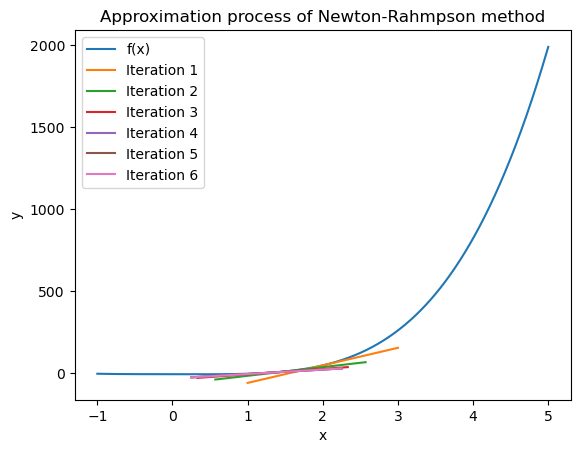

In [3]:
def f(x):
    return x**3 + 3*(x**4) - x - 8
def df(x):
    return 3*(x**2) + 12*x**3 - 1

x0 = 2
plot_newton(f, df, x0)

##### Second Example

Scalar Valued Function
Approximate root x = -1.0000000271798057, iterations needed: 12




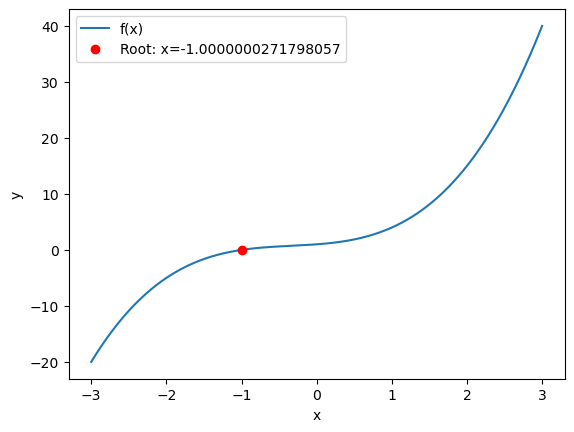

In [4]:
def f(x):
    return x**3 + x**2 + x + 1
def df(x):
    return 3*x**2 + 2*x + 1
    
x0 = 10
x, it = nrm.newton_rahmpson_method(f, df, x0)
    
print("Scalar Valued Function")
print(f'Approximate root x = {x}, iterations needed: {it}')
print("\n")

# Create a plot of the function and the root

x_val = np.linspace(-3, 3, 1000)
y_val = f(x_val)
plt.plot(x_val, y_val, label='f(x)')
plt.plot(x, f(x), 'ro', label='Root: x={}'.format(x))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

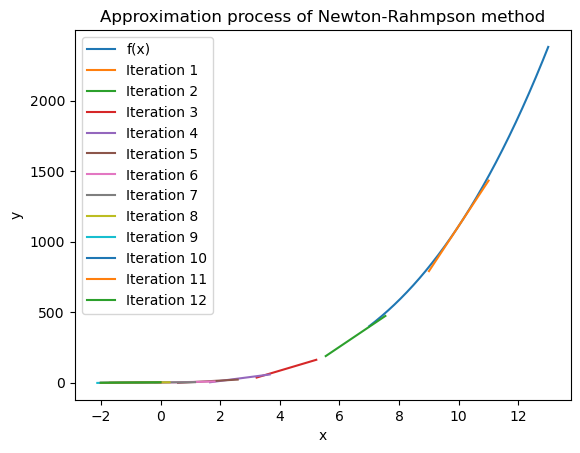

In [5]:
def f(x):
    return x**3 + x**2 + x + 1
def df(x):
    return 3*x**2 + 2*x + 1

x0 = 10
plot_newton(f, df, x0)

### For Vector Valued Functions 

##### First example

In [6]:
#give vector valued function
def f(x):
        return np.array([x[0]**2 + x[1]**2 - 3, x[0]*x[1] - 1])
    
#jacobian of given function    
def df(x):
        return np.array([[2*x[0], 2*x[1]], [x[1], x[0]]])
    
x0 = np.array([0.5, 1.5])
x, it = nrm.newton_rahmpson_method(f, df, x0)
    
print("Vector Valued Function")
print(f'Approximate root x = {x}, iterations needed: {it}')

Vector Valued Function
Approximate root x = [0.61803399 1.61803399], iterations needed: 5


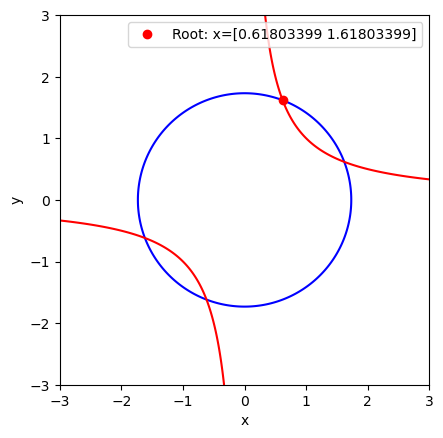

In [7]:
# Create a plot of the function and the root

x_val = np.linspace(-3, 3, 1000)
y_val = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x_val, y_val)

fig, ax = plt.subplots()

ax.set_aspect('equal')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

X, Y = np.meshgrid(x_val, y_val)
Z1 = X**2 + Y**2 - 3
Z2 = X*Y - 1

ax.contour(X, Y, Z1, levels=[0], colors='blue')
ax.contour(X, Y, Z2, levels=[0], colors='red')
ax.plot(x[0], x[1], 'ro', label='Root: x={}'.format(x))
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()


##### Second Example 

In [8]:
#give vector valued function
def f(x):
        return np.array([x[0]**2 + 2*x[1] + 2 ,3*x[0] + 2*x[1]**2 - 3 ])

#jacobian of given function    
def df(x):
        return np.array([[2*x[0], x[1]], [3 , 4*x[1]]])
    
x0 = np.array([2, 1])
x, it = nrm.newton_rahmpson_method(f, df, x0)
    
print("Vector Valued Function")
print(f'Approximate root x = {x}, iterations needed: {it}')

Vector Valued Function
Approximate root x = [-1.3137412  -1.86295781], iterations needed: 29


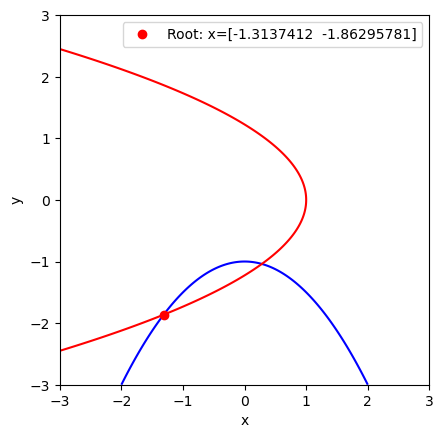

In [9]:
# Create a plot of the function and the root

x_val = np.linspace(-3, 3, 1000)
y_val = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x_val, y_val)

fig, ax = plt.subplots()

ax.set_aspect('equal')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

X, Y = np.meshgrid(x_val, y_val)
Z1 = X**2 + 2*Y + 2
Z2 = 3*X + 2*Y**2 - 3

ax.contour(X, Y, Z1, levels=[0], colors='blue')
ax.contour(X, Y, Z2, levels=[0], colors='red')
ax.plot(x[0], x[1], 'ro', label='Root: x={}'.format(x))
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()
